# Custom data training

## 학습데이터 디렉토리 구조

- train/validation/test 데이터셋 디렉토리를 각각 생성한다.
- images 폴더에 이미지 파일을, labels 폴더에 annotation 파일들을 저장한다.
    - annotation 파일은 대상 image 파일과 이름이 같아야 하고 확장자는 txt로 한다.

![img](figures/img.png)

- YOLO object detection annotation 파일 형식
    - 공백을 구분자로 하는 csv 파일 형식
    - 한줄에 한개 object의 정보를 작성한다.
    - `label center_x, center_y, bbox_width, bbox_height`
        - bbox 위치정보는 image의 size 에 대한 비율로 정의한다.
        - 예)
            ```
            0.0    0.329934450147929     0.5672360751315789    0.25200291331360947   0.15803108815789477
            0.0    0.8026219956360947    0.5186609456578948    0.0975965039940829    0.08419689131578946
            ```


## 학습 설정 yaml 파일 작성
- 다음 항목들을 작성한다.
    - train: train dataset 저장경로
    - test: test dataset 저장경로
    - val: validation dataset 저장경로
        - train/test/validation 저장경로는 절대경로로 작성한다.
    - nc: class 개수
    - names: class name
        ```yaml
        train: C:\datasets\train
        test: C:\datasets\test
        val: C:\datasets\val
        nc: 2
        names: ["car", "bus"]
        ```

> yaml: https://yaml.org/

## Training 하기
### CLI

<b style='font-size:1.3em'>1.  학습시작</b>
```bash
yolo detect train data=custom_data.yaml model=yolov8n.pt epochs=100 imgsz=640
```
- model: train 지정
- data: 학습관련 설정 파일 경로로 다음을 설정한다.
    - train/test/validation dataset 저장경로
    - class 개수
    - class name
- model: fine tuning 시 시작 Pretrained Model 파일 경로
- args
    - epochs: 반복횟수
    - imgsz: input image size
    - https://docs.ultralytics.com/cfg/

<b style='font-size:1.3em'>2. 이어서 학습하기</b>
```bash
yolo detect train resume model=last.pt
```
- model: 마지막으로 저장된 파일 경로

### Python

1. YOLO객체 생성
    - Fine tuning할 경우 pretrained 모델파일 저장 경로를 지정한다.
    - 새로 학습할 경우 모델구조를 정의한 yaml 설정파일 저장 경로를 지정한다.
2. train
    - train 설정 yaml 파일의 위치와 train을 위한 정보들을 매개변수로 전달한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# 디렉토리, 파일 경로 변수
import os
DATA_TARGET_DIR_PATH = './dataset_comp'
DATASET_TARGET_DIR_PATH = r'./datasets/fruits2'

os.makedirs(DATA_TARGET_DIR_PATH, exist_ok=True)

## Dataset 다운 및 복사

- https://universe.roboflow.com/bohni-tech/fruits-and-vegi/

In [2]:
!pip install wget --upgrade
import wget

DATA_SOURCE_FILE_PATH = wget.download("https://universe.roboflow.com/ds/zeboj2RMLi?key=8NoMSoXc2m", out=DATA_TARGET_DIR_PATH)


KeyboardInterrupt: 

In [11]:
DATA_SOURCE_FILE_PATH ='./dataset_comp/Fruits and Vegi.v13-verison8.yolov8.zip'

In [3]:
import wget

DATA_SOURCE_FILE_PATH = wget.download("https://universe.roboflow.com/ds/8rc4bOyQKf?key=wlXA0GNOho", out=DATA_TARGET_DIR_PATH)


In [4]:
from zipfile import ZipFile

with ZipFile(DATA_SOURCE_FILE_PATH) as zipFile:
    zipFile.extractall(DATASET_TARGET_DIR_PATH)

# 과일, 야채 image detection

In [2]:
fruits = ['Apple', 'Banana', 'Beetroot', 'Bitter_Gourd', 'Bottle_Gourd', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Chilli', 'Coconut', 'Cucumber',
            'EggPlant', 'Ginger', 'Grape', 'Green_Orange', 'Kiwi', 'Maize', 'Mango', 'Melon', 'Okra', 'Onion', 'Orange', 'Peach', 'Pear', 'Peas',
            'Pineapple', 'Pomegranate', 'Potato', 'Radish', 'Strawberry', 'Tomato', 'Turnip', 'Watermelon']

## yaml 설정파일 작성

In [9]:
!pip install pyyaml

In [3]:
# python: dictionary <-----> yaml
# 출력할 데이터를 dictionary로 구성
import yaml
import os

data = {
    "train":r"../../../train/images",
    "val":r"../../../valid/images",
    "test":r"../../../test/images",
    "nc":35,
    "names":fruits
}
os.makedirs("data", exist_ok=True)# 저장할 디렉토리 생성

with open('./datasets/fruits2/custom_data.yaml', 'wt') as fw:
    yaml.dump(data, fw)

In [4]:
with open('./datasets/fruits2/custom_data.yaml', 'rt') as fr:
    d = yaml.safe_load(fr)
    print(type(d))
    print(d)

<class 'dict'>
{'names': ['Apple', 'Banana', 'Beetroot', 'Bitter_Gourd', 'Bottle_Gourd', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Chilli', 'Coconut', 'Cucumber', 'EggPlant', 'Ginger', 'Grape', 'Green_Orange', 'Kiwi', 'Maize', 'Mango', 'Melon', 'Okra', 'Onion', 'Orange', 'Peach', 'Pear', 'Peas', 'Pineapple', 'Pomegranate', 'Potato', 'Radish', 'Strawberry', 'Tomato', 'Turnip', 'Watermelon'], 'nc': 35, 'test': '../../../test/images', 'train': '../../../train/images', 'val': '../../../valid/images'}


## 학습

In [12]:
# yolov8 설치
!pip install ultralytics --upgrade

In [5]:
from ultralytics import YOLO

model = YOLO('./models/yolov8n.pt')
# 학습 - train()메소드 호출
model.train(data='./datasets/fruits2/custom_data.yaml',
            epochs=20,
            patience=10, # 지정한 epoch만큼 성능이 개선이 안되면 조기종료.
            batch=64, #batch size
            imgsz=640, #input image size
            optimizer='Adam'
            )

Ultralytics YOLOv8.0.117 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
yolo/engine/trainer: task=detect, mode=train, model=./models/yolov8n.pt, data=./datasets/fruits2/custom_data.yaml, epochs=20, patience=10, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [6]:
# 쿠다 메모리 해제
from torch import cuda
cuda.empty_cache()

- <b style='font-size:1.5em'>결과</b>
```bash
Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    100/100      39.5G     0.7396     0.5254      1.153         98        640: 100%|██████████| 137/137 [01:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]
                   all        147        613      0.768      0.846      0.877      0.652

100 epochs completed in 3.049 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25860025 parameters, 0 gradients, 78.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  3.00s/it]
                   all        147        613      0.803      0.826      0.876      0.652
                 Apple        147         22      0.806      0.864      0.897      0.772
                Banana        147          7      0.777      0.857      0.917      0.582
          Bitter_Gourd        147          4      0.683       0.25      0.351      0.125
               Cabbage        147         38       0.85      0.896      0.953      0.731
                Carrot        147          9          1      0.967      0.995      0.531
                Cherry        147          2      0.814          1      0.995      0.895
               Coconut        147          1      0.379          1      0.995      0.995
              Cucumber        147         13      0.901      0.846       0.86      0.648
                Ginger        147         14      0.902      0.929      0.952      0.592
                 Grape        147          6       0.85          1      0.995      0.752
          Green_Orange        147         12      0.894          1      0.995      0.913
                  Kiwi        147         13      0.681      0.988      0.936      0.702
                 Mango        147         33      0.966      0.879      0.964      0.749
                 Melon        147         31      0.845      0.529      0.709      0.394
                  Okra        147          2      0.921        0.5      0.502      0.301
                 Onion        147         15      0.798      0.867      0.938      0.618
                Orange        147         14      0.933      0.857      0.932      0.805
                 Peach        147         16      0.941      0.688      0.904      0.748
                  Pear        147          9       0.93          1      0.995      0.798
                  Peas        147          1      0.408          1      0.995      0.895
             Pineapple        147         30      0.844      0.733      0.812      0.463
           Pomegranate        147         18      0.928          1      0.995      0.836
                Potato        147        208      0.767      0.659      0.764      0.419
            Strawberry        147         19      0.937          1      0.995      0.807
                Tomato        147         50      0.796       0.74       0.88      0.583
                Turnip        147          3      0.297      0.333       0.45      0.203
            Watermelon        147         23      0.829      0.913      0.973      0.738
Speed: 1.3ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3
```


## 평가
- YOLO객체 생성시 저장된 모델파일 경로를 넣어 생성한다.
    - 학습할때 사용한 yaml파일 학습때와 동일한 경로에 있어야 한다.
    - train/validation/test 데이터셋이 yaml에 등록된 경로에 있어야 한다.
- `YOLO.val()` 이용
    - DetMetrics 타입 객체에 결과를 담아 반환

In [7]:
best_model_path = './runs/detect/train28/weights/best.pt'

best_model = YOLO(best_model_path)

metrics = best_model.val()

Ultralytics YOLOv8.0.117 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
Model summary (fused): 168 layers, 3012473 parameters, 0 gradients
val: Scanning /home/parking/ml/ml_colab_project/Object_Detection/datasets/fruits/valid/labels.cache... 147 images, 1 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                   all        147        613      0.791      0.681      0.776      0.568
                 Apple        147         22      0.936      0.669       0.85      0.746
                Banana        147          7      0.715      0.716      0.827       0.54
          Bitter_Gourd        147          4      0.249       0.25      0.134     0.0541
               Cabbage        147         38      0.683      0.947       0.96      0.752
                Carrot        147          9      0.612      0.5

In [8]:
print(metrics.box.map)  # map50-95

0.5675204868919397


In [9]:
print(metrics.box.map50)

0.776430819993807


In [10]:
print(metrics.box.map75)

0.6371260972164159


In [11]:
print(metrics.box.maps) # 클래스별 ap score를 확인

[    0.74605     0.53971     0.56752    0.054092     0.56752     0.75236     0.56752     0.37437     0.56752      0.8955     0.56752      0.8955     0.63012     0.56752     0.46976     0.76899     0.89852     0.51774     0.56752     0.72602     0.38134     0.10066     0.37109      0.7728     0.64913      0.7109
     0.50994     0.28944     0.84378     0.39172     0.56752     0.77117     0.45416    0.063192     0.74502]


In [12]:
for label, ap in zip(fruits, metrics.box.maps):
    print(label, ":", ap)

Apple : 0.7460474729306928
Banana : 0.5397114569262274
Beetroot : 0.5675204868919397
Bitter_Gourd : 0.054092206386986086
Bottle_Gourd : 0.5675204868919397
Cabbage : 0.752358193811796
Capsicum : 0.5675204868919397
Carrot : 0.3743732873850124
Cauliflower : 0.5675204868919397
Cherry : 0.8955
Chilli : 0.5675204868919397
Coconut : 0.8955
Cucumber : 0.6301158016439115
EggPlant : 0.5675204868919397
Ginger : 0.46976252591247114
Grape : 0.768995
Green_Orange : 0.8985163620230701
Kiwi : 0.5177352063492064
Maize : 0.5675204868919397
Mango : 0.7260240162449244
Melon : 0.38133564674090387
Okra : 0.1006630434782609
Onion : 0.37108646692794617
Orange : 0.7727955645129726
Peach : 0.6491276436581321
Pear : 0.7108972249190938
Peas : 0.5099375
Pineapple : 0.289435098308216
Pomegranate : 0.8437752009167303
Potato : 0.39172082720315216
Radish : 0.5675204868919397
Strawberry : 0.7711709469133808
Tomato : 0.45416139886270324
Turnip : 0.06319233775212343
Watermelon : 0.7450227162744595


# 추론

In [16]:
from ultralytics import YOLO
from glob import glob

model = YOLO('./models/best.pt')

In [17]:
file_list = glob(r"test_image/fruits_veg/*.jpg")
file_list

['test_image/fruits_veg/capsicum1.jpg',
 'test_image/fruits_veg/pineapple2.jpg',
 'test_image/fruits_veg/melon1.jpg',
 'test_image/fruits_veg/pomegranate.jpg',
 'test_image/fruits_veg/eggplant.jpg',
 'test_image/fruits_veg/banana.jpg',
 'test_image/fruits_veg/grape.jpg',
 'test_image/fruits_veg/banana2.jpg',
 'test_image/fruits_veg/capsicum2.jpg',
 'test_image/fruits_veg/pineapple.jpg',
 'test_image/fruits_veg/melon2.jpg',
 'test_image/fruits_veg/apple.jpg']

In [18]:
result = model(file_list, save=True)


0: 640x640 4 Capsicums, 1: 640x640 5 Pineapples, 2: 640x640 1 Melon, 3: 640x640 2 Pomegranates, 4: 640x640 (no detections), 5: 640x640 2 Bananas, 6: 640x640 3 Grapes, 7: 640x640 1 Banana, 8: 640x640 4 Capsicums, 9: 640x640 1 Pineapple, 10: 640x640 3 Melons, 11: 640x640 6 Apples, 2 Onions, 28.5ms
Speed: 1.7ms preprocess, 2.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


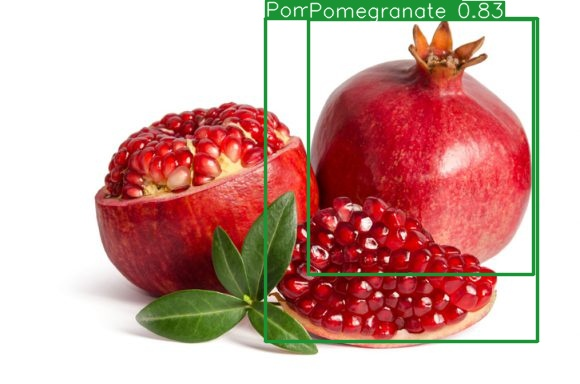

In [53]:
pred_path = './runs/detect/predict/*.*'

from matplotlib import pyplot as plt
from PIL import Image as img

imgs = []

for path in glob(pred_path):
    imgs.append(img.open(path))
    
imgs[3]